In [1]:
!pip install parsivar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.2 MB 318 kB/s 
     |████████████████████████████████| 1.5 MB 36.1 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492972 sha256=b98048a2c3976755a83377090b401ca6f3c446ed7aefe9e1b72ac349461a3618
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449921 sha256=cdf4f39f4750126817822e9f28e821712968190d748a11588607bb3852764f61
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [14]:
!wget http://vectors.nlpl.eu/repository/20/61.zip
!unzip 61.zip

--2022-09-15 14:33:47--  http://vectors.nlpl.eu/repository/20/61.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730416332 (697M) [application/zip]
Saving to: ‘61.zip’

61.zip              100%[===================>] 696.58M  18.2MB/s    in 40s     

2022-09-15 14:34:27 (17.5 MB/s) - ‘61.zip’ saved [730416332/730416332]



In [2]:
from parsivar import Normalizer, Tokenizer, FindStems
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow as tf
import pandas as pd

In [4]:
data = pd.read_csv('./train.csv', sep='\t')

data.iloc[0,1]
commentsColumn = data.iloc[:,1]

In [22]:
dev = pd.read_csv('./dev.csv', sep='\t')
validationCommentsColumn = dev.iloc[:,1]

In [5]:
def preprocessing(data):
  commentsColumn = data.iloc[:,1]
  comments = norm(commentsColumn)
  TokenedComments = token(comments)
  # embedding = load_word_embedding(path)
  # stemmedComments = stem(TokenedComments)
  vectorizedReviews = get_word2vec_enc(TokenedComments)
  alignedReviews = alignItems(30, vectorizedReviews)
  return alignedReviews

In [6]:
def norm(commentsColumn):
  comments = []
  norm = Normalizer(pinglish_conversion_needed = True)
  for text in commentsColumn:
    comments.append(norm.normalize(text))
  return comments

In [7]:
def token(comments):
  tokenizer = Tokenizer()
  TokenedComments = []
  for item in comments:
    TokenedComments.append(tokenizer.tokenize_words(item))
  return TokenedComments

In [20]:
path = "./model.txt"
def load_word_embedding(path, errors='replace'):
  embedding = dict()
  files= open(path,errors=errors, mode='r')
  lines = files.readlines()[1:]
  files.close()
  for line in lines:
    values = line.split()
    embedding[values[0]] = np.array(values[1:], dtype='float32')
  return embedding
embedding = load_word_embedding(path)

In [ ]:
def stem(TokenedComments):
  stemmer = FindStems()
  stemmedComments = list()
  for itemIndex in range(len(TokenedComments)):
    for tokenIndex in range(len(TokenedComments[itemIndex])):
      withAmperSan = stemmer.convert_to_stem(TokenedComments[itemIndex][tokenIndex])
      TokenedComments[itemIndex][tokenIndex] = withAmperSan.split("&")[0]
  return TokenedComments
# print (stemmer.convert_to_stem("بخوابیم"))

In [ ]:
# print(comments[1]), TokenedComments[1], len(TokenedComments[1])

In [9]:
def get_word2vec_enc(sentences):
    encoded_reviews = []
    for sentence in sentences:
      oneSentence = []
      for token in sentence:
        if (token in embedding):
          oneSentence.append(embedding[token])
      encoded_reviews.append(oneSentence)
    return encoded_reviews
# vectorizedReviews = get_word2vec_enc(TokenedComments)


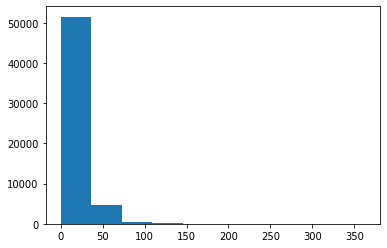

In [ ]:
lengthesOfReviews = []
for item in vectorizedReviews:
  lengthesOfReviews.append(len(item))
def show_histogram_chart(data):
    plt.hist(data)
    plt.show()
show_histogram_chart(lengthesOfReviews)


In [10]:
def alignItems(maxLen,array):
    pad = [0] * 100
    allSentences = []
    for sentence in array:
        newSentence = []
        paddingCount = maxLen - len(sentence)
        if (paddingCount < 0):
          newSentence = sentence[0:maxLen]
        else:
          newSentence = sentence
          for token in range(paddingCount):
              newSentence.append(pad)
        allSentences.append(newSentence)
    return allSentences

In [32]:
data.iloc[:,1]

0          واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح
1        قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...
2        قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...
3        عالللی بود همه چه درست و به اندازه و کیفیت خوب...
4                            شیرینی وانیلی فقط یک مدل بود.
                               ...                        
56695    یک تیکه کم فرستاده بودن و با تماس من در کمترین...
56696    عالی بود همه چیز ممنونم پیک هم خیلی مرتب و به ...
56697    مثل همیشه عالی، من چندمین باره سفارش میدم و هر...
56698        دلستر استوایی خواسته بودم اما لیمویی فرستادند
56699    جای مرغ گریل شده ناگت بود، به این نمی‌گن چیکن ...
Name: comment, Length: 56700, dtype: object

In [21]:
alignedReviews = preprocessing(data)

In [23]:
alignedReviewsValidation = preprocessing(dev)

In [ ]:
# alignedReviews = alignItems(30, vectorizedReviews)

In [24]:
len(alignedReviews[120])

30

In [ ]:
len(alignedReviewsValidation[120])

30

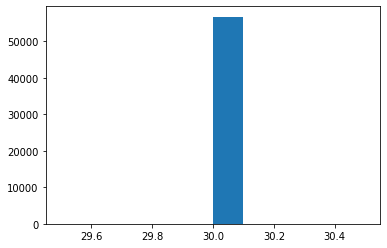

In [25]:
lengthesOfReviews = []
for item in alignedReviews:
  lengthesOfReviews.append(len(item))
def show_histogram_chart(data):
    plt.hist(data)
    plt.show()
show_histogram_chart(lengthesOfReviews)

In [26]:
model = Sequential()
# model.add(Embedding(100, 100, weights=embedding))
# model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(100))
model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# tfdataset = tf.data.Dataset.from_tensor_slices(np.array(alignedReviews)).batch(32)

In [ ]:
alignedReviews[:10]

In [28]:
X = np.array(alignedReviews)
y = np.array(data['label_id'])

In [33]:
X_validation = np.array(alignedReviewsValidation)
y_validation = np.array(dev["label_id"])

In [34]:
outputOfFittedModel = model.fit(X, y, epochs=10, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/10
1772/1772 [==============================] - 18s 6ms/step - loss: 0.4655 - accuracy: 0.7789 - val_loss: 0.4250 - val_accuracy: 0.8071
Epoch 2/10
1772/1772 [==============================] - 10s 5ms/step - loss: 0.4058 - accuracy: 0.8198 - val_loss: 0.3929 - val_accuracy: 0.8213
Epoch 3/10
1772/1772 [==============================] - 10s 6ms/step - loss: 0.3823 - accuracy: 0.8316 - val_loss: 0.3805 - val_accuracy: 0.8306
Epoch 4/10
1772/1772 [==============================] - 10s 6ms/step - loss: 0.3664 - accuracy: 0.8406 - val_loss: 0.3947 - val_accuracy: 0.8208
Epoch 5/10
1772/1772 [==============================] - 10s 6ms/step - loss: 0.3515 - accuracy: 0.8483 - val_loss: 0.3692 - val_accuracy: 0.8362
Epoch 6/10
1772/1772 [==============================] - 10s 6ms/step - loss: 0.3427 - accuracy: 0.8525 - val_loss: 0.3715 - val_accuracy: 0.8335
Epoch 7/10
1772/1772 [==============================] - 10s 6ms/step - loss: 0.3315 - accuracy: 0.8579 - val_loss: 0.3647 - val_ac

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 80,501
Trainable params: 80,501
Non-trainable params: 0
_________________________________________________________________


In [36]:
# evaluate the model
_, train_acc = model.evaluate(X, y, verbose=0)
_, test_acc = model.evaluate(X_validation, y_validation, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.887, Test: 0.837


In [40]:
data.iloc[0]

Unnamed: 0                                                  0
comment       واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح
label                                                     SAD
label_id                                                    1
Name: 0, dtype: object

In [44]:
test_text = model.predict(X)

In [62]:
data.iloc[8,1]

'همه اقلام تازه و به روز وخیلیییییی سریع بدستم رسید واقعا متشکرم'

In [64]:
test_text[9]

array([0.32974392], dtype=float32)

Text(0.5, 1.0, 'loss')

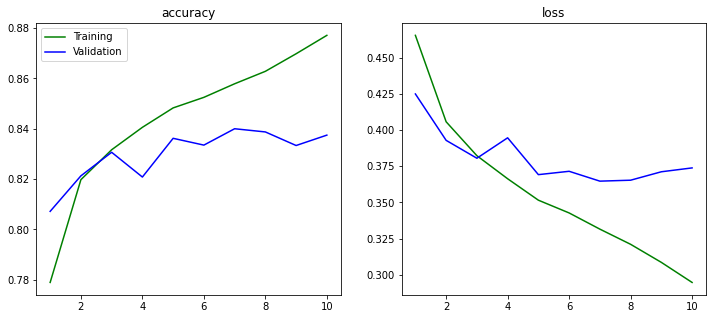

In [35]:
acc = outputOfFittedModel.history['accuracy']
val_acc = outputOfFittedModel.history['val_accuracy']
loss = outputOfFittedModel.history['loss']
val_loss = outputOfFittedModel.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'g', label='Training')
plt.plot(x, val_acc, 'b', label='Validation')
plt.title('accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'g', label='Training')
plt.plot(x, val_loss, 'b', label='Validation')
plt.title('loss')